In [40]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [12]:
#Read the csv generated by Anthony which shows power plant locations by county
powerplant_data = "../Output/power_us_comp_df.csv"
powerplant_data_df = pd.read_csv(powerplant_data, encoding="ISO-8859-1")
powerplant_data_df

,Unnamed: 0,primary_fuel,state,county,postcode
0,0,Solar,New York,Rockland County,10994.0
1,1,Solar,North Carolina,Lee County,27332.0
2,2,Solar,North Carolina,Yadkin County,28642.0
3,3,Solar,New Jersey,Mercer County,8691.0
4,4,Solar,Massachusetts,Norfolk County,2038.0
...,...,...,...,...,...
9828,9828,Waste,Illinois,Lake County,60096.0
9829,9829,Gas,Kentucky,Jefferson County,40207.0
9830,9830,Wind,New York,Ontario County,14456.0
9831,9831,Solar,Minnesota,Goodhue County,55992.0


In [20]:
#Only look at the power plant type and county and state
powerplant_data_df = powerplant_data_df[["primary_fuel", "postcode", "county"]]
powerplant_data_LA_df = powerplant_data_df.loc[powerplant_data_df["county"] == "Los Angeles County"]
powerplant_data_LA_df = powerplant_data_LA_df.dropna().reset_index(drop = True)
powerplant_data_LA_df["postcode"] = powerplant_data_LA_df["postcode"].astype("int")
powerplant_data_LA_df

,primary_fuel,postcode,county
0,Solar,90744,Los Angeles County
1,Solar,90021,Los Angeles County
2,Gas,90808,Los Angeles County
3,Gas,90277,Los Angeles County
4,Gas,91405,Los Angeles County
...,...,...,...
163,Solar,90731,Los Angeles County
164,Solar,91750,Los Angeles County
165,Waste,90602,Los Angeles County
166,Cogeneration,90810,Los Angeles County


In [23]:
#Ignore all other columns
powerplant_data_LA_df = powerplant_data_LA_df.rename(columns = {"postcode": "zipcode"})
powerplant_data_LA_df

,primary_fuel,zipcode,county
0,Solar,90744,Los Angeles County
1,Solar,90021,Los Angeles County
2,Gas,90808,Los Angeles County
3,Gas,90277,Los Angeles County
4,Gas,91405,Los Angeles County
...,...,...,...
163,Solar,90731,Los Angeles County
164,Solar,91750,Los Angeles County
165,Waste,90602,Los Angeles County
166,Cogeneration,90810,Los Angeles County


In [24]:
#Get a list of all counties in the dataset
zipcodes = powerplant_data_LA_df["zipcode"].unique()
zipcodes

array([90744, 90021, 90808, 90277, 91405, 91403, 93535, 91411, 93536,
       91383, 91702, 90081, 91321, 90639, 93591, 90670, 90638, 91604,
       90046, 91340, 90840, 91301, 91125, 90220, 91350, 90650, 90009,
       90012, 90077, 90810, 90242, 91754, 91311, 90266, 90296, 90245,
       91342, 90032, 90502, 90210, 91105, 91201, 91352, 90058, 90831,
       90740, 90501, 91789, 90710, 91502, 93539, 91302, 90802, 91792,
       90086, 91706, 91324, 91605, 90041, 90731, 90723, 90704, 91371,
       90601, 91803, 90640, 93534, 90404, 91773, 91312, 90049, 80755,
       93553, 91326, 90813, 90504, 90095, 90052, 91343, 91766, 90230,
       91745, 90732, 91750, 90602])

In [25]:
#Get a list of all fuel types in the data set
fuel_types = powerplant_data_LA_df["primary_fuel"].unique()
fuel_types

array(['Solar', 'Gas', 'Waste', 'Hydro', 'Storage', 'Biomass',
       'Cogeneration', 'Wind', 'Oil'], dtype=object)

In [28]:
#This is INCREDIBLY inefficient code, but it did give us the data we need - I'd like to look through at a more efficient way to do it

#Create a set of empty lists to store the total number of each type of powerplant by county
total_solar = []
total_gas = []
total_oil = []
total_hydro = []
total_wind = []
total_coal = []
total_biomass = []
total_waste = []
total_storage = []
total_cogeneration = []
total_geothermal = []
total_petcoke = []
total_nuclear = []
total_other = []
total = 0

#Run through every county in the list
for zipcode in zipcodes:
    #Set the total number of each plant to zero at the start of each run
    num_solar = 0
    num_gas = 0
    num_oil = 0
    num_hydro = 0
    num_wind = 0
    num_coal = 0
    num_biomass = 0
    num_waste = 0
    num_storage = 0
    num_cogeneration = 0
    num_geothermal = 0
    num_petcoke = 0
    num_nuclear = 0
    num_other = 0
    
    #Run through the whole dataframe
    for index, row in powerplant_data_LA_df.iterrows():
        
        #Look for counties that match the county name in each iteration of the loop
        if (powerplant_data_LA_df.loc[index, "zipcode"] == zipcode):
        
            #Check the fuel type for each row and add 1 to the relevant number
            if (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Solar"):
                num_solar= num_solar + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Gas"):
                num_gas = num_gas + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Oil"):
                num_oil = num_oil + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Hydro"):
                num_hydro = num_hydro + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Wind"):
                num_wind = num_wind + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Coal"):
                num_coal = num_coal + 1   
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Biomass"):
                num_biomass = num_biomass + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Waste"):
                num_waste = num_waste + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Storage"):
                num_storage = num_storage + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Cogeneration"):
                num_cogeneration = num_cogeneration + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Geothermal"):
                num_geothermal = num_geothermal + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Petcoke"):
                num_petcoke = num_petcoke + 1 
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Nuclear"):
                num_nuclear = num_nuclear + 1
            elif (powerplant_data_LA_df.loc[index, "primary_fuel"] == "Other"):
                num_other = num_other + 1

    #Store the number of each plant in the list. 
    # This will be in the same order as the counties in counties list
    total_solar.append(num_solar)
    total_gas.append(num_gas)
    total_oil.append(num_oil)
    total_hydro.append(num_hydro)
    total_wind.append(num_wind)
    total_coal.append(num_coal)
    total_biomass.append(num_biomass)
    total_waste.append(num_waste)
    total_storage.append(num_storage)
    total_cogeneration.append(num_cogeneration)
    total_geothermal.append(num_geothermal)
    total_petcoke.append(num_petcoke)
    total_nuclear.append(num_nuclear)
    total_other.append(num_other)
    
    #This code was very slow because I was running through the whole dataframe for each county in the list
    #So I included this to let me know the progress as it ran
    total = total + 1
    print(f"Total complete: {total} out of {len(zipcodes)}")



Total complete: 1 out of 85
Total complete: 2 out of 85
Total complete: 3 out of 85
Total complete: 4 out of 85
Total complete: 5 out of 85
Total complete: 6 out of 85
Total complete: 7 out of 85
Total complete: 8 out of 85
Total complete: 9 out of 85
Total complete: 10 out of 85
Total complete: 11 out of 85
Total complete: 12 out of 85
Total complete: 13 out of 85
Total complete: 14 out of 85
Total complete: 15 out of 85
Total complete: 16 out of 85
Total complete: 17 out of 85
Total complete: 18 out of 85
Total complete: 19 out of 85
Total complete: 20 out of 85
Total complete: 21 out of 85
Total complete: 22 out of 85
Total complete: 23 out of 85
Total complete: 24 out of 85
Total complete: 25 out of 85
Total complete: 26 out of 85
Total complete: 27 out of 85
Total complete: 28 out of 85
Total complete: 29 out of 85
Total complete: 30 out of 85
Total complete: 31 out of 85
Total complete: 32 out of 85
Total complete: 33 out of 85
Total complete: 34 out of 85
Total complete: 35 out 

In [30]:
#Turn all the lists into one dataframe
powerplant_data_LA_by_zipcode_df = pd.DataFrame({
    "zipcode": zipcodes,
    "num_solar": total_solar,
    "num_gas": total_gas,
    "num_oil": total_oil,
    "num_hydro": total_hydro,
    "num_wind": total_wind,
    "num_coal": total_coal,
    "num_biomass": total_biomass,
    "num_storage" : total_storage,
    "num_cogeneration" : total_cogeneration,
    "num_geothermal" : total_geothermal,
    "num_petcoke" : total_petcoke,
    "num_nuclear" : total_nuclear, 
    "num_other" : total_other
})
powerplant_data_LA_by_zipcode_df

,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#Then publish the  dataframe to a csv file to be analyzed later
powerplant_data_LA_by_zipcode_df.to_csv("../Output/powerplants_by_zipcode_in_LA.csv")

In [32]:
#Read the csv
income_data = "../Resources/LA_2017_median_income_by_zipcode.csv"
income_data_df = pd.read_csv(income_data, encoding="ISO-8859-1")
income_data_df

,zipcode,total_households,total_households_margin_of_error,median_income,median_income_margin_of_error
0,90001,13807,276,35660,1392
1,90002,12694,271,34000,2747
2,90003,16581,368,34397,2224
3,90004,22140,370,46581,1656
4,90005,16399,382,32461,1606
...,...,...,...,...,...
297,93552,10147,278,60612,2599
298,93553,787,128,58105,23353
299,93560,6894,310,55526,7136
300,93563,129,46,83875,16508


In [33]:
#Get only the important columns
income_data_df = income_data_df[["zipcode", "total_households", "median_income"]]
income_data_df

,zipcode,total_households,median_income
0,90001,13807,35660
1,90002,12694,34000
2,90003,16581,34397
3,90004,22140,46581
4,90005,16399,32461
...,...,...,...
297,93552,10147,60612
298,93553,787,58105
299,93560,6894,55526
300,93563,129,83875


In [35]:
#Merge both dataframes together
total_data_df = pd.merge(powerplant_data_LA_by_zipcode_df, income_data_df, on="zipcode", how="left")

total_data_df

,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,total_households,median_income
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0,14509.0,43284
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0,1966.0,12864
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0,13924.0,102563
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0,15797.0,101532
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0,17519.0,41283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0,13088.0,79242
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0,16204.0,81397
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0,8610.0,89440
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0,11799.0,83743


In [36]:
#Create a column to store the total number of powerplants
total_data_df["Total Powerplants"] = (total_data_df["num_solar"] +
                                            total_data_df["num_gas"] +
                                            total_data_df["num_oil"] +
                                            total_data_df["num_hydro"] +
                                            total_data_df["num_wind"] +
                                            total_data_df["num_coal"] +
                                            total_data_df["num_biomass"] +
                                            total_data_df["num_storage"] +
                                            total_data_df["num_cogeneration"] +
                                            total_data_df["num_geothermal"] +
                                            total_data_df["num_petcoke"] +
                                            total_data_df["num_nuclear"] +
                                            total_data_df["num_other"])
total_data_df

,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,total_households,median_income,Total Powerplants
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0,14509.0,43284,6
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0,1966.0,12864,1
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0,13924.0,102563,2
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0,15797.0,101532,1
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0,17519.0,41283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0,13088.0,79242,1
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0,16204.0,81397,1
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0,8610.0,89440,3
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0,11799.0,83743,1


In [38]:
#Drop any rows where the total number of powerplants is "N/A" (this doesn't remove any 0s)
total_data_df["Total Combustion Plants"] = (total_data_df["num_gas"] +
                                            total_data_df["num_oil"] +
                                            total_data_df["num_coal"] +
                                            total_data_df["num_biomass"] +
                                            total_data_df["num_petcoke"])


,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,total_households,median_income,Total Powerplants,Total Combustion Plants
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0,14509.0,43284,6,3
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0,1966.0,12864,1,0
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0,13924.0,102563,2,1
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0,15797.0,101532,1,1
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0,17519.0,41283,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0,13088.0,79242,1,0
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0,16204.0,81397,1,1
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0,8610.0,89440,3,0
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0,11799.0,83743,1,0


In [51]:
total_data_df = total_data_df.dropna()
total_data_df = total_data_df.loc[total_data_df["median_income"] != "-"]
total_data_df["median_income"] = total_data_df["median_income"].astype("int")
total_data_df

,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,total_households,median_income,Total Powerplants,Total Combustion Plants
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0,14509.0,43284,6,3
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0,1966.0,12864,1,0
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0,13924.0,102563,2,1
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0,15797.0,101532,1,1
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0,17519.0,41283,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0,13088.0,79242,1,0
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0,16204.0,81397,1,1
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0,8610.0,89440,3,0
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0,11799.0,83743,1,0


The r-value for this is -0.10591467527076384


<function matplotlib.pyplot.show(*args, **kw)>

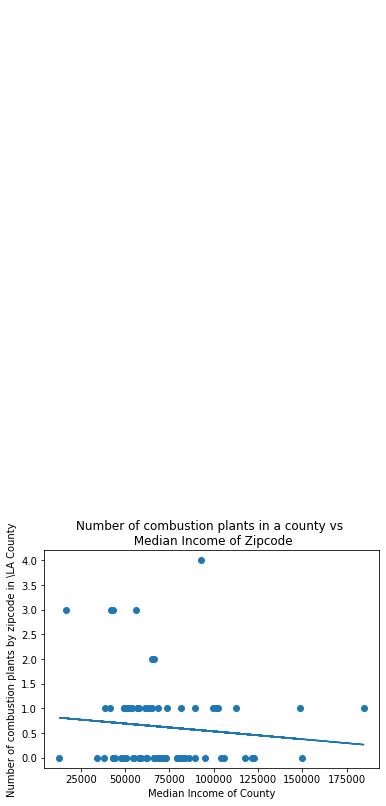

In [52]:
#Plot the total electricity generated by each state
#Against the price per kWh in the state

x_values = total_data_df["median_income"]
y_values = total_data_df["Total Combustion Plants"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(100000,15),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (100000,13), fontsize = 12.5, color = "red")
plt.xlabel("Median Income of County")
plt.ylabel("Number of combustion plants by zipcode in \LA County")
plt.title("Number of combustion plants in a county vs \n Median Income of Zipcode")
print(f"The r-value for this is {rvalue}")

# plt.savefig("../Output/Images/combustion_plants_per_household_against_median_income(Inc_Outliers).png")
plt.show


In [54]:
total_data_df["Combustions_plants_per_10000_households"] = (total_data_df["Total Combustion Plants"]/total_data_df["total_households"])*10000
total_data_df

,zipcode,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,total_households,median_income,Total Powerplants,Total Combustion Plants,Combustions_plants_per_household,Combustions_plants_per_10000_households
0,90744,3,3,0,0,0,0,0,0,0,0,0,0,0,14509.0,43284,6,3,0.000207,2.067682
1,90021,1,0,0,0,0,0,0,0,0,0,0,0,0,1966.0,12864,1,0,0.000000,0.000000
2,90808,1,1,0,0,0,0,0,0,0,0,0,0,0,13924.0,102563,2,1,0.000072,0.718184
3,90277,0,1,0,0,0,0,0,0,0,0,0,0,0,15797.0,101532,1,1,0.000063,0.633032
4,91405,0,1,0,0,0,0,0,0,0,0,0,0,0,17519.0,41283,1,1,0.000057,0.570809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,90230,0,0,0,1,0,0,0,0,0,0,0,0,0,13088.0,79242,1,0,0.000000,0.000000
81,91745,0,1,0,0,0,0,0,0,0,0,0,0,0,16204.0,81397,1,1,0.000062,0.617132
82,90732,3,0,0,0,0,0,0,0,0,0,0,0,0,8610.0,89440,3,0,0.000000,0.000000
83,91750,1,0,0,0,0,0,0,0,0,0,0,0,0,11799.0,83743,1,0,0.000000,0.000000


The r-value for this is -0.19569546023362677


<function matplotlib.pyplot.show(*args, **kw)>

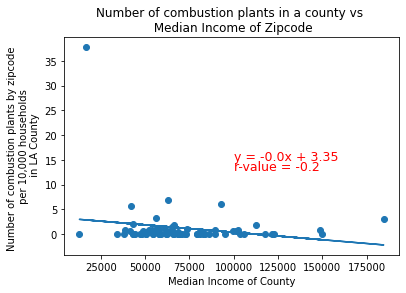

In [55]:
#Plot the total electricity generated by each state
#Against the price per kWh in the state

x_values = total_data_df["median_income"]
y_values = total_data_df["Combustions_plants_per_10000_households"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(100000,15),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (100000,13), fontsize = 12.5, color = "red")
plt.xlabel("Median Income of County")
plt.ylabel("Number of combustion plants by zipcode \n per 10,000 households \n in LA County")
plt.title("Number of combustion plants in a county vs \n Median Income of Zipcode")
print(f"The r-value for this is {rvalue}")

# plt.savefig("../Output/Images/combustion_plants_per_household_against_median_income(Inc_Outliers).png")
plt.show